In [124]:
import numpy as np
import util
import pandas as pd
import matplotlib.pyplot as plt

from linear_model import LinearModel

In [125]:
def main(train_path, eval_path, pred_path, eps, lr):
    """Problem 3(d): Poisson regression with gradient ascent.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
        eps: Small parameter for convergence. Training stops when step sizes fall below this value.
        lr: Learning rate.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    #Load validation set
    x_eval, y_eval = util.load_dataset(csv_path=eval_path, add_intercept=True)

    #Train Poissionian regression model
    clf = PoissonRegression()
    clf.fit(x=x_train, y=y_train, eps=eps, lr=lr)

    #Produce predictions from validation set
    y_pred = clf.predict(x_eval)
    data = {"Predicted y": y_pred, "True y": y_eval}

    y_pred_df = pd.DataFrame(data)
    y_pred_df.to_csv(pred_path, index=False)

    tolerances = np.logspace(-5, -1, base=10, num=100)
    acceptable_guesses = []

    for i in tolerances:
        correct = 0
        total = 0
        for j in range(len(y_pred)):
            if abs(y_pred[j] - y_eval[j]) <= abs(y_eval[j])*i:
                correct += 1

            total += 1
        acceptable_guesses.append(correct / total)

    plt.plot(tolerances, np.multiply(acceptable_guesses, 100))
    plt.xscale('log')
    plt.ylabel(f'% of guesses in fractional error of ground truth')
    plt.xlabel('Fractional error')
    plt.title(f'Performance of Poissonian Model on \nDataset of Size {len(y_eval)}')
    plt.show()


class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y, eps, lr):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
            eps: Small parameter to test for convergence. When dtheta falls below this threshold, terminate.
            lr: Learning rate for training
        """

        #Extract characteristics of data
        no_examples = x.shape[0]
        no_features = x.shape[1]

        #Initialise theta
        if self.theta == None:
            self.theta = np.zeros(no_features)

        converged = False
        while not converged:
            dtheta = 1 / no_examples * (y-np.exp(self.theta @ x.T)) @ x

            if np.linalg.norm(dtheta) < eps:
                converged = True
            else:
                self.theta += lr * dtheta


    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """

        #Vector of eta values for each of the training examples
        eta = np.dot(x, self.theta)
        y_pred = np.exp(eta)

        return y_pred

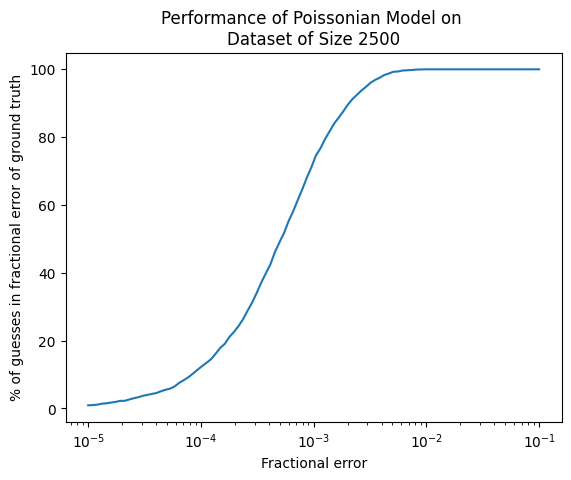

In [126]:
#Paths to training and validation sets
train_path = './data/ds4_train.csv'
eval_path = './data/ds4_train.csv'

#Path where predictions will be stored
pred_path = './predictions/poisson_predictions_ds4.csv'

#Set hyperparameters for training
eps = 1e-5
lr = 1e-7

main(
    train_path=train_path, 
    eval_path=eval_path, 
    pred_path=pred_path, 
    eps=eps, 
    lr=lr
    )